## CS5785 Fall 2021 Applied Machine Learning Homework 1: PROGRAMMING EXERCISE 1 - Digital Recognizer

### By Hao Geng (hg457),  Siyi Chen(sc2358)

In [26]:
import sklearn
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import squareform, cdist, pdist
from sklearn.model_selection import train_test_split
import sklearn.metrics
import sklearn.neighbors
import pandas

## (a) Join the [Digit Recognizer](https://www.kaggle.com/c/digit-recognizer) competition on Kaggle. Download the training and test data. The competition page describes how these files are formatted.

In [27]:
def read_data_to_nparray(filename, if_split):
  data1 = []
  data2 = []

  is_first_line = True
  for line in open(filename):
    if is_first_line is True:
      is_first_line = False
      continue
    r = line.split(',')
    if if_split is True:
      data1.append([int(x) for x in r[1:]])
      data2.append(int(r[0]))
    else:
      data1.append([int(x) for x in r])

  return np.array(data1), np.array(data2)

In [28]:
# Read train.csv file
data, result = read_data_to_nparray('train.csv', True)

# print(data.shape)
# print(result.shape)

## (b) Write a function to display an MNIST digit. Display one of each digit.

In [29]:
def display_one_digit(image_pix):
  pixels = image_pix.reshape((28, 28))
  plt.imshow(pixels, cmap='gray')
  plt.show()

Display first digit 0 (index 1)


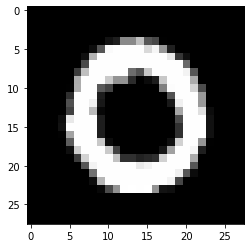

Display first digit 1 (index 0)


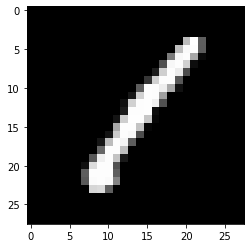

Display first digit 2 (index 16)


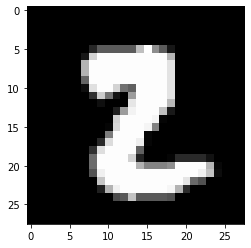

Display first digit 3 (index 7)


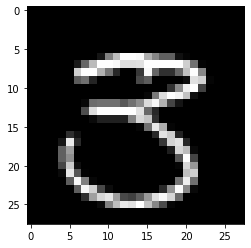

Display first digit 4 (index 3)


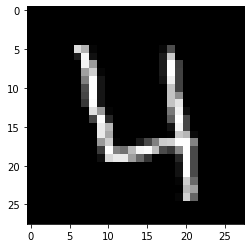

Display first digit 5 (index 8)


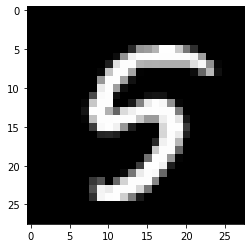

Display first digit 6 (index 21)


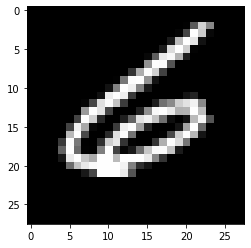

Display first digit 7 (index 6)


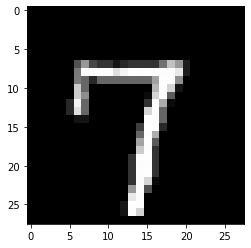

Display first digit 8 (index 10)


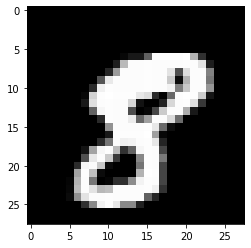

Display first digit 9 (index 11)


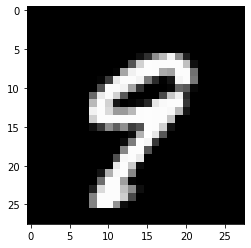

In [30]:
for num in range(10):
  ind = np.where(result==num)[0][0] # get the index of the first num
  print('Display first digit ' + str(num) + ' (index ' + str(ind) + ')')
  display_one_digit(data[ind])

## (c) Examine the prior probability of the classes in the training data. Is it uniform across the digits? Display a normalized histogram of digit counts. Is it even?

In [31]:
print(np.unique(result))
bin = range(0,11)

[0 1 2 3 4 5 6 7 8 9]


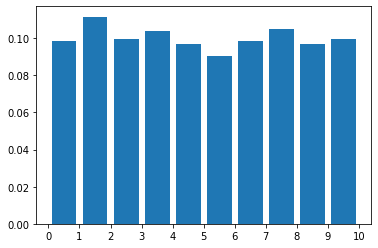

In [32]:
# display the count info
# plt.hist(result, bins=bin, rwidth=0.8) # y is count
plt.hist(result, bins=bin, density=True, rwidth=0.8) # y is percentage
plt.xticks(bin)
plt.show()

[0.09838095 0.11152381 0.09945238 0.10359524 0.09695238 0.09035714
 0.0985     0.10478571 0.0967381  0.09971429]
[ 0  1  2  3  4  5  6  7  8  9 10]


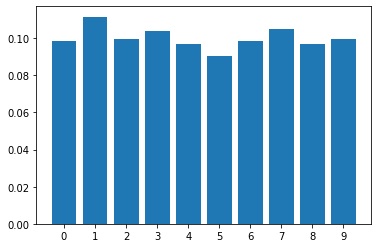

In [33]:
# method 2
hist, bin_edges = np.histogram(result, bins=bin, density=True)
print(hist) # [0.09838095 0.11152381 0.09945238 0.10359524 0.09695238 0.09035714  0.0985     0.10478571 0.0967381  0.09971429]
print(bin_edges) # [ 0  1  2  3  4  5  6  7  8  9 10]

# plot hist in percent
plt.bar(np.unique(result), hist)
plt.xticks(range(0,10))
plt.show()

## Summary:
- It is neither uniformed nor even

## (d) Pick one example of each digit from your training data. Then, for each sample digit, compute and show the best match (nearest neighbor) between your chosen sample and the rest of the training data. Use L2 distance between the two images’ pixel values as the metric. This probably won’t be perfect, so add an asterisk next to the erroneous examples (if any).

In [34]:
def calc_euclidean_dis(data_set, to_predict):
  d=(cdist([to_predict], data_set), 'euclidean')
  return d[0]

In [35]:
for num in range(10):
  # cal the distances
  ind = np.where(result==num)[0][0] # get the index of the first num
  # print('Display first digit ' + str(num)  + ' (index ' + str(ind) + ') distances.')
  dis = calc_euclidean_dis(data, data[ind])

  # the best match (nearest neighbor) between your chosen sample and the rest of the training data
  # get the min index and distance, excluding itself
  distinct_dis = np.delete(dis, ind)
  min_dis = np.min(distinct_dis)
  min_ind = np.argmin(distinct_dis)

  # add an asterisk next to the erroneous examples (if any)
  # the min_ind record is the min_ind+1 record in data (if including the anchor record)
  target_ind = min_ind + (1 if min_ind >= ind else 0)
  print('Digit '+ str(num) + ' (index ' + str(ind) + ') best match: '
        + str(result[target_ind]) + ' (index ' + str(target_ind) + ')' + ('*' if result[target_ind] != num else ''))

Digit 0 (index 1) best match: 0 (index 12950)
Digit 1 (index 0) best match: 1 (index 29704)
Digit 2 (index 16) best match: 2 (index 9536)
Digit 3 (index 7) best match: 5 (index 8981)*
Digit 4 (index 3) best match: 4 (index 14787)
Digit 5 (index 8) best match: 5 (index 30073)
Digit 6 (index 21) best match: 6 (index 16240)
Digit 7 (index 6) best match: 7 (index 15275)
Digit 8 (index 10) best match: 8 (index 32586)
Digit 9 (index 11) best match: 9 (index 35742)


## (e) Consider the case of binary comparison between the digits 0 and 1. Ignoring all the other digits, compute the pairwise distances for all genuine matches and all impostor matches, again using the L2 norm. Plot histograms of the genuine and impostor distances on the same set of axes.

In [36]:
# Ignoring all the other digits, 
binary_indies = np.where(result<2)[0]
binary_data = data[binary_indies]
binary_result = result[binary_indies]
# print(binary_data)
# print(binary_data.shape)

# compute the pairwise distances for all genuine matches and all impostor matches, again using the L2 norm. 
binary_dist = squareform(pdist(binary_data,'euclidean'))
# print(binary_dist)

In [37]:
# collect the genuine and impostor distances
genuine_dis = []
impostor_dis = []
binary_pred = []
for row in range(binary_dist.shape[0]):
  # get the min index and distance, excluding itself
  distinct_dis = np.delete(binary_dist[row], row)
  # min distance
  min_dis = np.min(distinct_dis)
  # min distance index
  min_ind = np.argmin(distinct_dis)
  # min index in binary_dist
  target_ind = min_ind + (1 if min_ind >= row else 0)
  if (min_dis != binary_dist[row][target_ind]):
    print('row ' + str(row) + ' index unmatching')
    print(min_dis, row, target_ind, binary_dist[row][target_ind])

  binary_pred.append(binary_result[target_ind])

  genuine_dis.append(min_dis)
  impostor_dis.extend(np.delete(distinct_dis, min_ind))

# print(genuine_dis)
print(len(genuine_dis))
print(len(impostor_dis))
print(binary_dist.shape[0])

8816
77704224
8816


4202.085553626913
209.54951682120387


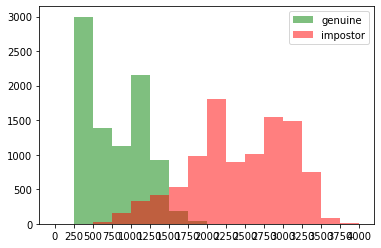

In [38]:
# Plot histograms of the genuine and impostor distances on the same set of axes.
print(np.max(impostor_dis))
print(np.min(genuine_dis))
bin=range(0, 4250, 250)
plt.hist(genuine_dis, bins=bin, alpha=0.5, color='g', label='genuine')
plt.hist(impostor_dis[:10000], bins=bin, alpha=0.5, color='r', label='impostor') # plot first 10000. Full dataset is too large
plt.xticks(bin)
plt.legend()
plt.show()

## (f) Generate an ROC curve from the above sets of distances. What is the equal error rate? What is the error rate of a classifier that simply guesses randomly?

In [39]:
cf = sklearn.metrics.confusion_matrix(binary_result, binary_pred)
pandas.DataFrame(cf, ('true %i'%x for x in range(2)), ('pred %i'%x for x in range(2)))

,pred 0,pred 1
true 0,4130,2
true 1,0,4684


Text(0, 0.5, 'tpr')

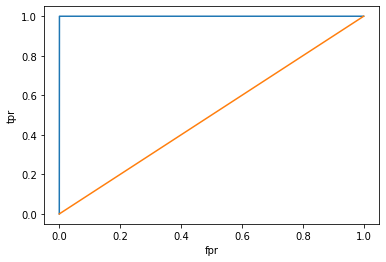

In [40]:
# Generate an ROC curve from the above sets of distances. 
fpr, tpr, thresholds = sklearn.metrics.roc_curve(binary_result, binary_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('fpr')
plt.ylabel('tpr')

## Summary
### What is the equal error rate? 
- 1  

### What is the error rate of a classifier that simply guesses randomly?
- 0.5

## (g) Implement a K-NN classifier. (You cannot use external libraries that implement K-NN for this question; it should be your own implementation. You can still use libraries such as numpy,scipy, pandas, etc., for data manipulation.)
Hint: You can use scipy.spatial.distance.cdist3 and numpy.argsort4 to make your implementation more efficient.

In [41]:
def knn_classififer(data_set, result_set, to_predict, neigh_num):
  if len(data_set) == 0 or len(data_set) != len(result_set) or neigh_num < 1:
    return []
  
  # calc distances
  dis = calc_euclidean_dis(data_set, to_predict)

  # sort the distances
  # argsort() return indics of sorted list
  sorted_dist_ind = dis.argsort()[0]

  # get the first k distances' indics, note their results
  predict_res = {}
  for i in range(k):
    vote_res = result_set[sorted_dist_ind[i]]
    predict_res[vote_res] = predict_res.get(vote_res, 0) + 1
 
  # get the result by predict_res
  max_count = 0
  max_res = 0
  for key, value in predict_res.items():
    if value > max_count:
      max_count = value
      max_res = key
  
  return max_res

## (h) Randomly split the training data into two halves. Train your k-NN classifier on the first half of the data, and test it on the second half, reporting your average accuracy. Note: If you find your implementation to be slow, you can instead select a subsample of 5,000 from the test setrather than the entire test set.

In [42]:
# Randomly split the training data into two halves.
X_train, X_test, Y_train, Y_test = train_test_split(data, result, test_size=.5, random_state=0)

# Train your k-NN classifier on the first half of the data, test it on the second half
k = 3
total_count = 5000 # max: len(X_test)
Y_pred = []
for curr_ind in range(total_count):
  pred_res = knn_classififer(X_train, Y_train, X_test[curr_ind], k)
  Y_pred.append(pred_res)

In [43]:
# average accuracy
score = sklearn.metrics.accuracy_score(Y_pred, Y_test[:total_count])
print(score)

0.9628


In [44]:
# compare with sklearn lib
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

Y_pred_lib = knn.predict(X_test[:total_count])

score = sklearn.metrics.accuracy_score(Y_pred_lib, Y_test[:total_count])
print(score)

0.9622


## (i) Generate a confusion matrix (of size 10×10) from your results. Which digits are particularly tricky to classify?

In [45]:
cf = sklearn.metrics.confusion_matrix(Y_test[:total_count], Y_pred)
pandas.DataFrame(cf, ('true %i'%x for x in range(10)), ('pred %i'%x for x in range(10)))


,pred 0,pred 1,pred 2,pred 3,pred 4,pred 5,pred 6,pred 7,pred 8,pred 9
true 0,487,0,1,1,0,2,2,0,0,1
true 1,0,559,2,0,0,0,0,1,2,0
true 2,6,3,481,2,0,0,1,5,3,0
true 3,1,1,2,504,0,5,0,4,4,1
true 4,1,4,0,0,483,0,3,0,0,19
true 5,0,0,0,9,0,409,10,0,2,2
true 6,0,1,0,0,2,1,497,0,0,0
true 7,0,6,1,0,1,0,0,536,0,9
true 8,1,3,0,14,2,12,5,1,402,3
true 9,1,1,0,3,7,1,1,10,0,456


## Summary:
### Which digits are particularly tricky to classify?
- 7 and 9
- 4 and 9
- 5 and 6
- 2 and 7
- 5 and 8
- 3 and 5
- 3 and 8
- 1 and 7
- 2 and 0

## (j) Train your classifier with all of the training data, and test your classifier with the test data. Submit your results to Kaggle. Note: You can also use scikit-learn’s K-NN implementation5 for this.

In [46]:
# read both files
X_train, Y_train = read_data_to_nparray('train.csv', True)
X_test , Y_test = read_data_to_nparray('test.csv', False)

In [48]:
# prediction
knn_mnist = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
knn_mnist.fit(X_train, Y_train)

Y_pred_knn = knn_mnist.predict(X_test)

In [50]:
def write_to_csv(filename):
  # key is the column name
  df = pandas.DataFrame({'ImageId': [x + 1 for x in range(len(Y_pred_knn))],'Label': Y_pred_knn})
  
  # index: if show row name, default=True
  df.to_csv(filename, index=False, sep=',')

write_to_csv('digit_recognizer_submission.csv')